# AFL 2 DATA MINING - PAK EDWIN 

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from datetime import datetime

In [265]:
#LOAD DATASET
df = pd.read_csv(r'C:\Users\asus\Documents\COLLEGE LIFE\SEMESTER 5\DATA MINING\AFL 2 - Pak Edwin\customer_analysis.csv', sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [266]:
#categorical feature that needs to be encoded into numerical format
label_encoder_1 = LabelEncoder()
label_encoder_2 = LabelEncoder()
df['Marital_Status_encoded'] = label_encoder_1.fit_transform(df['Marital_Status'])
df['Education_encoded'] = label_encoder_1.fit_transform(df['Education'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_encoded,Education_encoded
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,4,2
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,4,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,5,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,5,2
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,3,4


# DATA CLEANING AND PREPARATION

In [267]:
#MISSING VALUE
df.isna().sum()

ID                         0
Year_Birth                 0
Education                  0
Marital_Status             0
Income                    24
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Marital_Status_encoded     0
Education_encoded          0
dtype: int64

In [268]:
#DATE_TIME FORMAT
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_encoded,Education_encoded
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,4,2
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,4,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,5,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,5,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,3,4


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      2240 non-null   int64         
 1   Year_Birth              2240 non-null   int64         
 2   Education               2240 non-null   object        
 3   Marital_Status          2240 non-null   object        
 4   Income                  2216 non-null   float64       
 5   Kidhome                 2240 non-null   int64         
 6   Teenhome                2240 non-null   int64         
 7   Dt_Customer             2240 non-null   datetime64[ns]
 8   Recency                 2240 non-null   int64         
 9   MntWines                2240 non-null   int64         
 10  MntFruits               2240 non-null   int64         
 11  MntMeatProducts         2240 non-null   int64         
 12  MntFishProducts         2240 non-null   int64   

# Feature Engineering (Create/Remove feature from available data):

In [219]:
#

In [270]:
#Age Extraction
current_year = datetime.now().year
if 'Year_Birth' in df:
    df['Umur'] = 2023 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_encoded,Education_encoded,Umur
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,4,2,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,4,2,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,5,2,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,5,2,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,3,4,42


In [271]:
#Spending Power
column1 = df['MntWines']
column2 = df['MntFruits']
column3 = df['MntMeatProducts']
column4 = df['MntFishProducts']
column5 = df['MntSweetProducts']
column6 = df['MntSweetProducts']

total = column1 + column2 + column3 + column4 + column5 + column6
df['Total'] = total
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_encoded,Education_encoded,Umur,Total
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,4,2,66,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,4,2,69,22
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,5,2,58,755
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,5,2,39,51
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,3,4,42,434


In [272]:
#Household Living Arrangement

def living_with(status):
    if status in ['Married', 'Together']:
        return 'Couple'
    elif status in ['Divorced', 'Single', 'YOLO']:
        return 'Alone'
    else:
        return 'Unknown'
df['Living_With'] = df['Marital_Status'].apply(living_with)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_encoded,Education_encoded,Umur,Total,Living_With
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,4,2,66,1617,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,4,2,69,22,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,5,2,58,755,Couple
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,5,2,39,51,Couple
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,3,4,42,434,Couple


In [273]:
#Family Dynamics
df['Family Dynamics'] = df['Teenhome'] + df['Kidhome']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_encoded,Education_encoded,Umur,Total,Living_With,Family Dynamics
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,4,2,66,1617,Alone,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,4,2,69,22,Alone,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,5,2,58,755,Couple,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,5,2,39,51,Couple,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,3,4,42,434,Couple,1


In [274]:
#Family Unity
df['Family Unity'] = df[['Marital_Status_encoded', 'Family Dynamics']].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Marital_Status_encoded,Education_encoded,Umur,Total,Living_With,Family Dynamics,Family Unity
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,4,2,66,1617,Alone,0,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,4,2,69,22,Alone,2,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,5,2,58,755,Couple,0,5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,5,2,39,51,Couple,1,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,3,4,42,434,Couple,1,4


In [275]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Marital_Status_encoded,Education_encoded,Umur,Total,Living_With,Family Dynamics,Family Unity
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,4,2,66,1617,Alone,0,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,4,2,69,22,Alone,2,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,5,2,58,755,Couple,0,5
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,5,2,39,51,Couple,1,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,3,4,42,434,Couple,1,4


In [276]:
#Parental Status
df['Parental_Status'] = df.apply(lambda row: 'Parent' if (row['Family Dynamics'] > 0) and (row['Marital_Status'] in ['Married', 'Together', 'Divorced', 'Single', 'YOLO']) else 'Not Parent', axis = 1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Marital_Status_encoded,Education_encoded,Umur,Total,Living_With,Family Dynamics,Family Unity,Parental_Status
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,11,1,4,2,66,1617,Alone,0,4,Not Parent
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,4,2,69,22,Alone,2,6,Parent
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,5,2,58,755,Couple,0,5,Not Parent
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,5,2,39,51,Couple,1,6,Parent
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,3,4,42,434,Couple,1,4,Parent


In [277]:
#Educational Evolution
dataset = {'Education': ['PhD', 'Graduation', 'Master', '2n Cycle', 'Basic']}
df = pd.DataFrame(dataset)
def educational_evolution(education):
    if education in ['PhD', 'Master']:
        return 'Advanced Degree'
    elif education in['Graduation', '2n Cycle']:
        return "Bachelor's Degree"
    else: 
        return 'Basic Education'
df['Education Evolution'] = df['Education'].apply(educational_evolution)
df.head()


,Education,Education Evolution
0,PhD,Advanced Degree
1,Graduation,Bachelor's Degree
2,Master,Advanced Degree
3,2n Cycle,Bachelor's Degree
4,Basic,Basic Education


In [293]:
# Farewell to Redundancy
df = pd.read_csv(r'C:\Users\asus\Documents\COLLEGE LIFE\SEMESTER 5\DATA MINING\AFL 2 - Pak Edwin\customer_analysis.csv', sep = '\t')
label_encoder = LabelEncoder()
df['Marital_Status_encoded'] = label_encoder.fit_transform(df['Marital_Status'])
df['Education_encoded'] = label_encoder.fit_transform(df['Education'])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
columns = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntSweetProducts']]
df['Total'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntSweetProducts']].sum(axis=1)
def living_with(status):
    if status in ['Married', 'Together']:
        return 'Couple'
    else:
        return 'Alone'
df['Living_With'] = df['Marital_Status'].apply(living_with)
df['Family Dynamics'] = df['Teenhome'] + df['Kidhome']
df['Family Unity'] = df['Marital_Status_encoded'] + df['Family Dynamics']
def parental_status(row):
    if row['Family Dynamics'] > 0 and row['Marital_Status'] in ['Married', 'Together', 'Divorced', 'Single', 'YOLO']:
        return 'Parent'
    else:
        return 'Not Parent'
df['Parental_Status'] = df.apply(parental_status, axis=1)
def educational_evolution(education):
    if education in ['PhD', 'Master']:
        return 'Advanced Degree'
    elif education in ['Graduation', '2n Cycle']:
        return "Bachelor's Degree"
    else:
        return 'Basic Education'
df['Education Evolution'] = df['Education'].apply(educational_evolution)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Marital_Status_encoded,Education_encoded,Age,Total,Living_With,Family Dynamics,Family Unity,Parental_Status,Education Evolution
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,1,4,2,66,1617,Alone,0,4,Not Parent,Bachelor's Degree
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,4,2,69,22,Alone,2,6,Parent,Bachelor's Degree
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,5,2,58,755,Couple,0,5,Not Parent,Bachelor's Degree
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,5,2,39,51,Couple,1,6,Parent,Bachelor's Degree
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,4,42,434,Couple,1,4,Parent,Advanced Degree


# DATA PREPARATION

In [294]:
#LABEL ENCODING
label_encoder = LabelEncoder()
categorical_columns = ['Marital_Status', 'Education', 'Living_With', 'Parental_Status', 'Education Evolution']
for column in categorical_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Age,Total,Living_With,Family Dynamics,Family Unity,Parental_Status,Education Evolution,Living_With_encoded,Parental_Status_encoded,Education Evolution_encoded
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,66,1617,Alone,0,4,Not Parent,Bachelor's Degree,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,69,22,Alone,2,6,Parent,Bachelor's Degree,0,1,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,58,755,Couple,0,5,Not Parent,Bachelor's Degree,1,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,39,51,Couple,1,6,Parent,Bachelor's Degree,1,1,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,42,434,Couple,1,4,Parent,Advanced Degree,1,1,0


In [325]:
#SCALING
scaler = StandardScaler()
numerical_features = ['Age', 'Total', 'Family Unity']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [326]:
#DIMENSIONALITY REDUCTION
selected_features = ['Age', 'Total', 'Family Unity', 'Marital_Status_encoded', 'Family Dynamics']
dataset_for_pca = df[selected_features]
pca = PCA(n_components = 2)
reduced_features = pca.fit_transform(dataset_for_pca)
reduced_df = pd.DataFrame(data=reduced_features, columns = ['PCA1', 'PCA2'])

# CLUSTERING

C:\Users\asus\AppData\Local\Temp\ipykernel_47140\4159411412.py:7: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(features)
C:\Users\asus\AppData\Local\Temp\ipykernel_47140\4159411412.py:7: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(features)


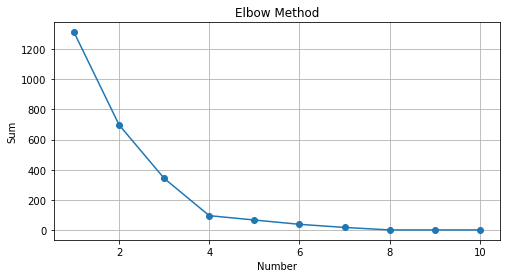

In [309]:
#ELBOW METHOD
features = df[['Kidhome', 'Teenhome']]
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(8,4))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number')
plt.ylabel('Sum')
plt.grid(True)
plt.show()

In [315]:
#AGGLOMERATIVE CLUSTERING
n_clusters = 2
agg_clustering = AgglomerativeClustering(n_clusters = n_clusters)
agg_clustering.fit(features)
clusters_labels = agg_clustering.labels_

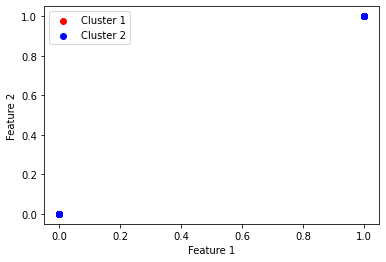

In [323]:
#SCATTER PLOT REVELATIONS
plt.scatter(features.loc[clusters_labels == 0, 'Kidhome'], features.loc[clusters_labels == 0, 'Kidhome'], c='red', label = 'Cluster 1')
plt.scatter(features.loc[clusters_labels == 1, 'Teenhome'], features.loc[clusters_labels == 1, 'Teenhome'], c='blue', label = 'Cluster 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# VISUALIZATION

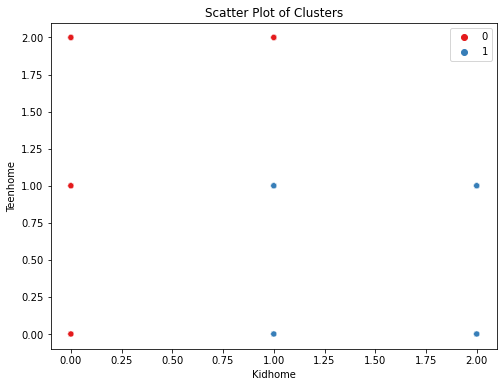

C:\Users\asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


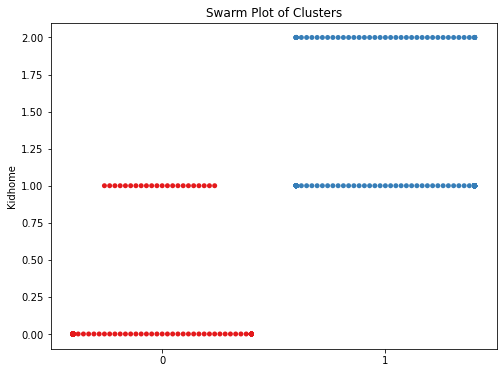

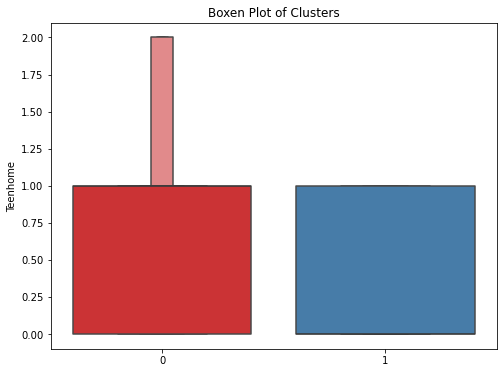

In [332]:
#you may use scatterplots, swarmplot, boxenplot to evaluate your clustering models
plt.figure(figsize=(8,6))
sns.scatterplot(x=features['Kidhome'], y=features['Teenhome'], hue=clusters_labels, palette="Set1")
plt.title('Scatter Plot of Clusters')
plt.show()

plt.figure(figsize=(8,6))
sns.swarmplot(x=clusters_labels, y=features['Kidhome'], palette="Set1")
plt.title('Swarm Plot of Clusters')
plt.show()

plt.figure(figsize=(8,6))
sns.boxenplot(x=clusters_labels, y=features['Teenhome'], palette="Set1")
plt.title('Boxen Plot of Clusters')
plt.show()


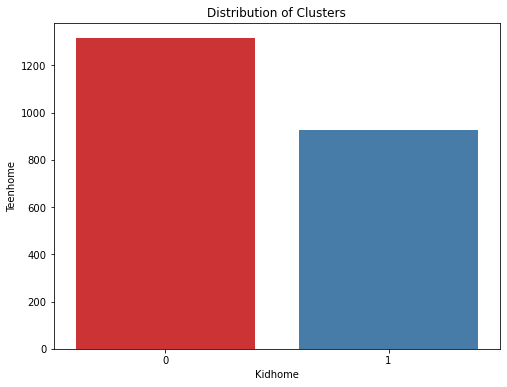

In [333]:
#draw distribution of cluster chart
plt.figure(figsize=(8,6))
sns.countplot(x=clusters_labels, palette="Set1")
plt.title('Distribution of Clusters')
plt.xlabel('Kidhome')
plt.ylabel('Teenhome')
plt.show()

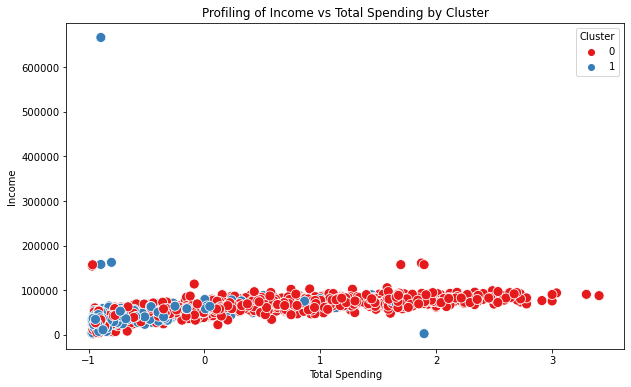

In [346]:
#profiling between income and spending cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total', y='Income', hue=clusters_labels, palette="Set1", s=100)
plt.title('Profiling of Income vs Total Spending by Cluster')
plt.xlabel('Total Spending')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()